In [2]:
import seaborn as sns
titanic=sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [9]:
#1. The overall survival rate

total_survived=titanic['survived'].sum(axis=0)
survival_rate=total_survived/len(titanic)
print(survival_rate)

0.3838383838383838


Survival rates based on sex
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64
Survival rates based on pclass
pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


<Axes: xlabel='sex', ylabel='survived'>

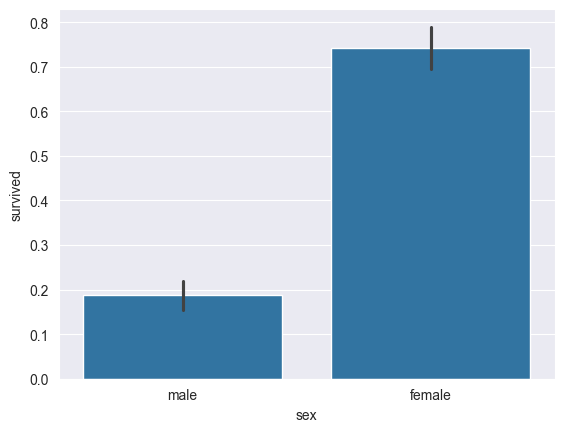

In [5]:
#2. Comparing survival rates based on sex and pclass.
total_survived_sex=titanic.groupby('sex')['survived'].sum()
survival_rate_sex=total_survived_sex/titanic.groupby('sex')['survived'].count()
print("Survival rates based on sex")
print(survival_rate_sex)
total_survived_pclass=titanic.groupby('pclass')['survived'].sum()
survival_rate_pclass=total_survived_pclass/titanic.groupby('pclass')['survived'].count()
print("Survival rates based on pclass")
print(survival_rate_pclass)

sns.set_style('darkgrid')
sns.barplot(x='sex', y='survived', data=titanic)


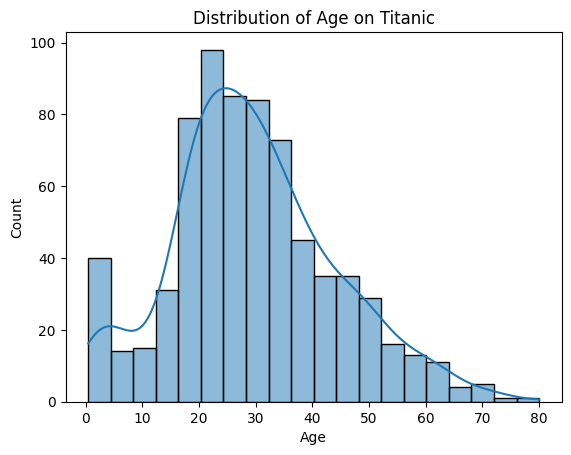

In [ ]:
#3. Distribution of Age on Titanic.
import matplotlib.pyplot as plt
sns.histplot(titanic['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age on Titanic')
plt.show()

In [29]:
#4. The average age of survivors vs. non-survivors.
avg_age=titanic.groupby('survived')['age'].mean()
print("The average age of survivors vs. non-survivors.")
print(avg_age.rename({0: "Non-Survivors", 1: "Survivors"}))


The average age of survivors vs. non-survivors.
survived
Non-Survivors    30.626179
Survivors        28.343690
Name: age, dtype: float64


In [34]:
#5. Checking if traveling alone (alone=True) affects survival.
number_alone=titanic.groupby('alone')['survived'].mean()
print(number_alone.rename({False:"not alone", True: "alone"}))



alone
not alone    0.505650
alone        0.303538
Name: survived, dtype: float64


In [36]:
#6. Finding the average fare for each pclass.
avg_fare_pclass=titanic.groupby('pclass')['fare'].mean()
print("Average fare for each passanger class:")
print(avg_fare_pclass.rename({1:"First Class", 2: "Second Class", 3:"Third Class"}))


Average fare for each passanger class:
pclass
First Class     84.154687
Second Class    20.662183
Third Class     13.675550
Name: fare, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_70948\342419039.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_fare=titanic.groupby('fare_bin')['survived'].mean()


fare_bin
(-0.001, 7.854]      0.217877
(7.854, 10.5]        0.201087
(10.5, 21.679]       0.424419
(21.679, 39.688]     0.444444
(39.688, 512.329]    0.642045
Name: survived, dtype: float64


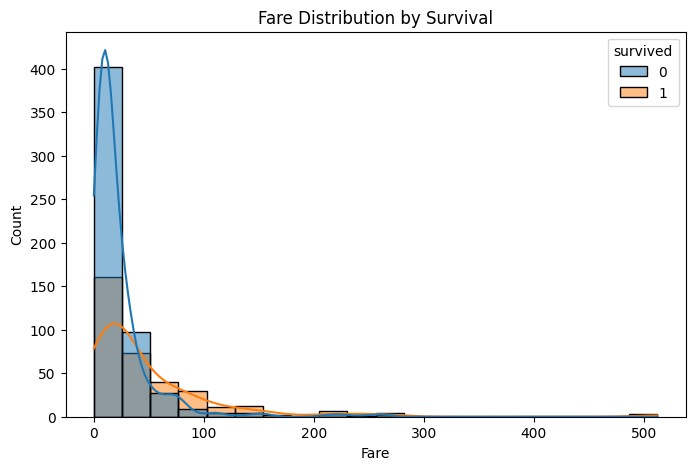

In [51]:
#7. Checking if higher fares increased survival chances.
import pandas as pd
titanic['fare_bin']=pd.qcut(titanic['fare'], q=5)
survival_rate_fare=titanic.groupby('fare_bin')['survived'].mean()
print(survival_rate_fare)
plt.figure(figsize=(8,5))
sns.histplot(titanic, x='fare', hue='survived', bins=20, kde=True)

plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution by Survival')

plt.show()

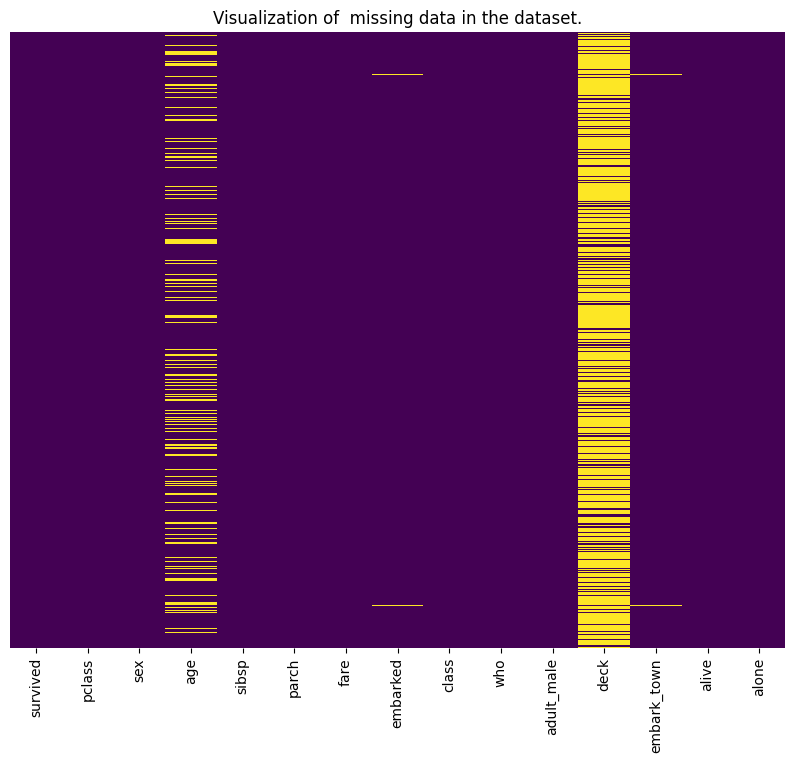

In [57]:
#8. Visualize missing data in the dataset.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(titanic.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Visualization of  missing data in the dataset.')
plt.show()


In [66]:
#9. Which city (embark_town) had the most passengers?
print("Missing values in embark_town:", titanic['embark_town'].isnull().sum())
titanic = titanic.dropna(subset=['embark_town'])
count_by_city=titanic['embark_town'].value_counts()
print('The city with the most passengers:')
print(count_by_city.idxmax())


Missing values in embark_town: 2
The city with the most passengers:
Southampton


In [76]:
#10.Survival Probability Based on Age Groups:
#Divide passengers into groups (children, young adults, middle-aged, seniors) and compare survival rates.
import pandas as pd

bins = [0, 17, 35, 60, 100] 
labels = ["Child", "Young Adult", "Middle-aged", "Senior"]
titanic.loc[:, 'age'] = titanic['age'].fillna(titanic['age'].median())
titanic['age_group'] = pd.cut(titanic['age'], bins=bins, labels=labels, right=False)
survival_rate_age = titanic.groupby('age_group', observed=False)['survived'].mean()
print("Survival Probability Based on Age Groups")
print(survival_rate_age)


Survival Probability Based on Age Groups
age_group
Child          0.550000
Young Adult    0.347122
Middle-aged    0.416268
Senior         0.269231
Name: survived, dtype: float64


<Axes: >

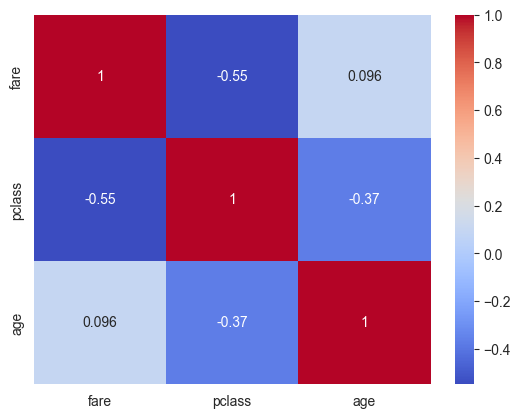

In [ ]:
#11. Correlation Between 'fare', 'pclass', 'age' columns
corr = titanic[['fare', 'pclass', 'age']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
